Forma original de X: (14700, 250)
Forma original de Y: (1, 250)
CE_x shape: (175, 14700)
CE_y shape: (175,)
CV_x shape: (75, 14700)
CV_y shape: (75,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/163
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - auc: 0.5009 - loss: 0.8934 - val_auc: 0.2402 - val_loss: 1.7943
Epoch 2/163
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - auc: 0.3253 - loss: 1.6949 - val_auc: 0.2627 - val_loss: 1.0884
Epoch 3/163
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - auc: 0.3831 - loss: 1.0130 - val_auc: 0.7366 - val_loss: 0.7096
Epoch 4/163
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - auc: 0.6203 - loss: 0.7514 - val_auc: 0.7918 - val_loss: 1.0229
Epoch 5/163
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - auc: 0.7145 - loss: 1.0709 - val_auc: 0.8150 - val_loss: 0.8949
Epoch 6/163
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - auc: 0.6813 - loss: 0.9531 - val_auc: 0.7965 - val_loss: 0.6620
Epoch 7/163
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - auc: 0.7122 - loss: 0.6593 - val_auc: 0.5025 - val_loss: 0.7286
Epoch 8/163
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - auc: 0.5378 - loss: 0.7454 - val_auc: 0.4513 - val_loss: 0.8428
Epoch 9/163
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - auc: 0.5514 - 

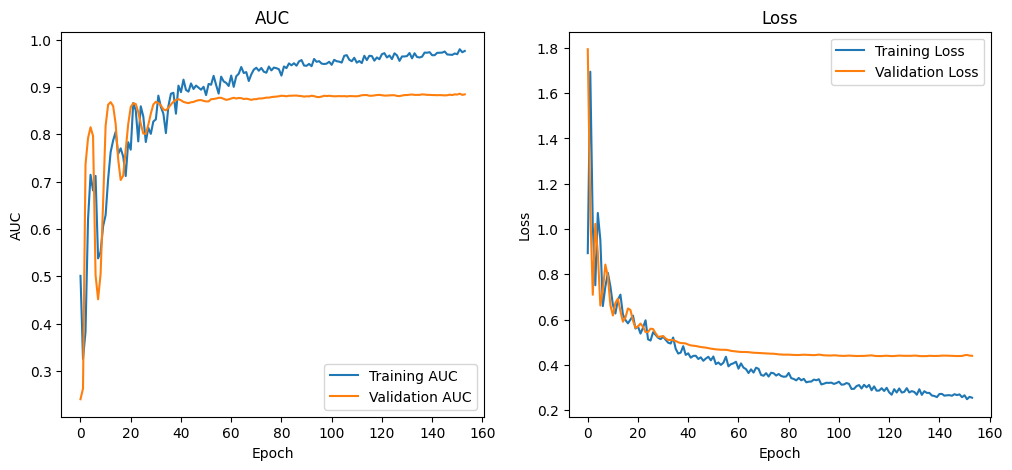

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - auc: 0.9153 - loss: 0.3981
Loss en validación: 0.43831542134284973
AUC en validación: 0.8833575248718262


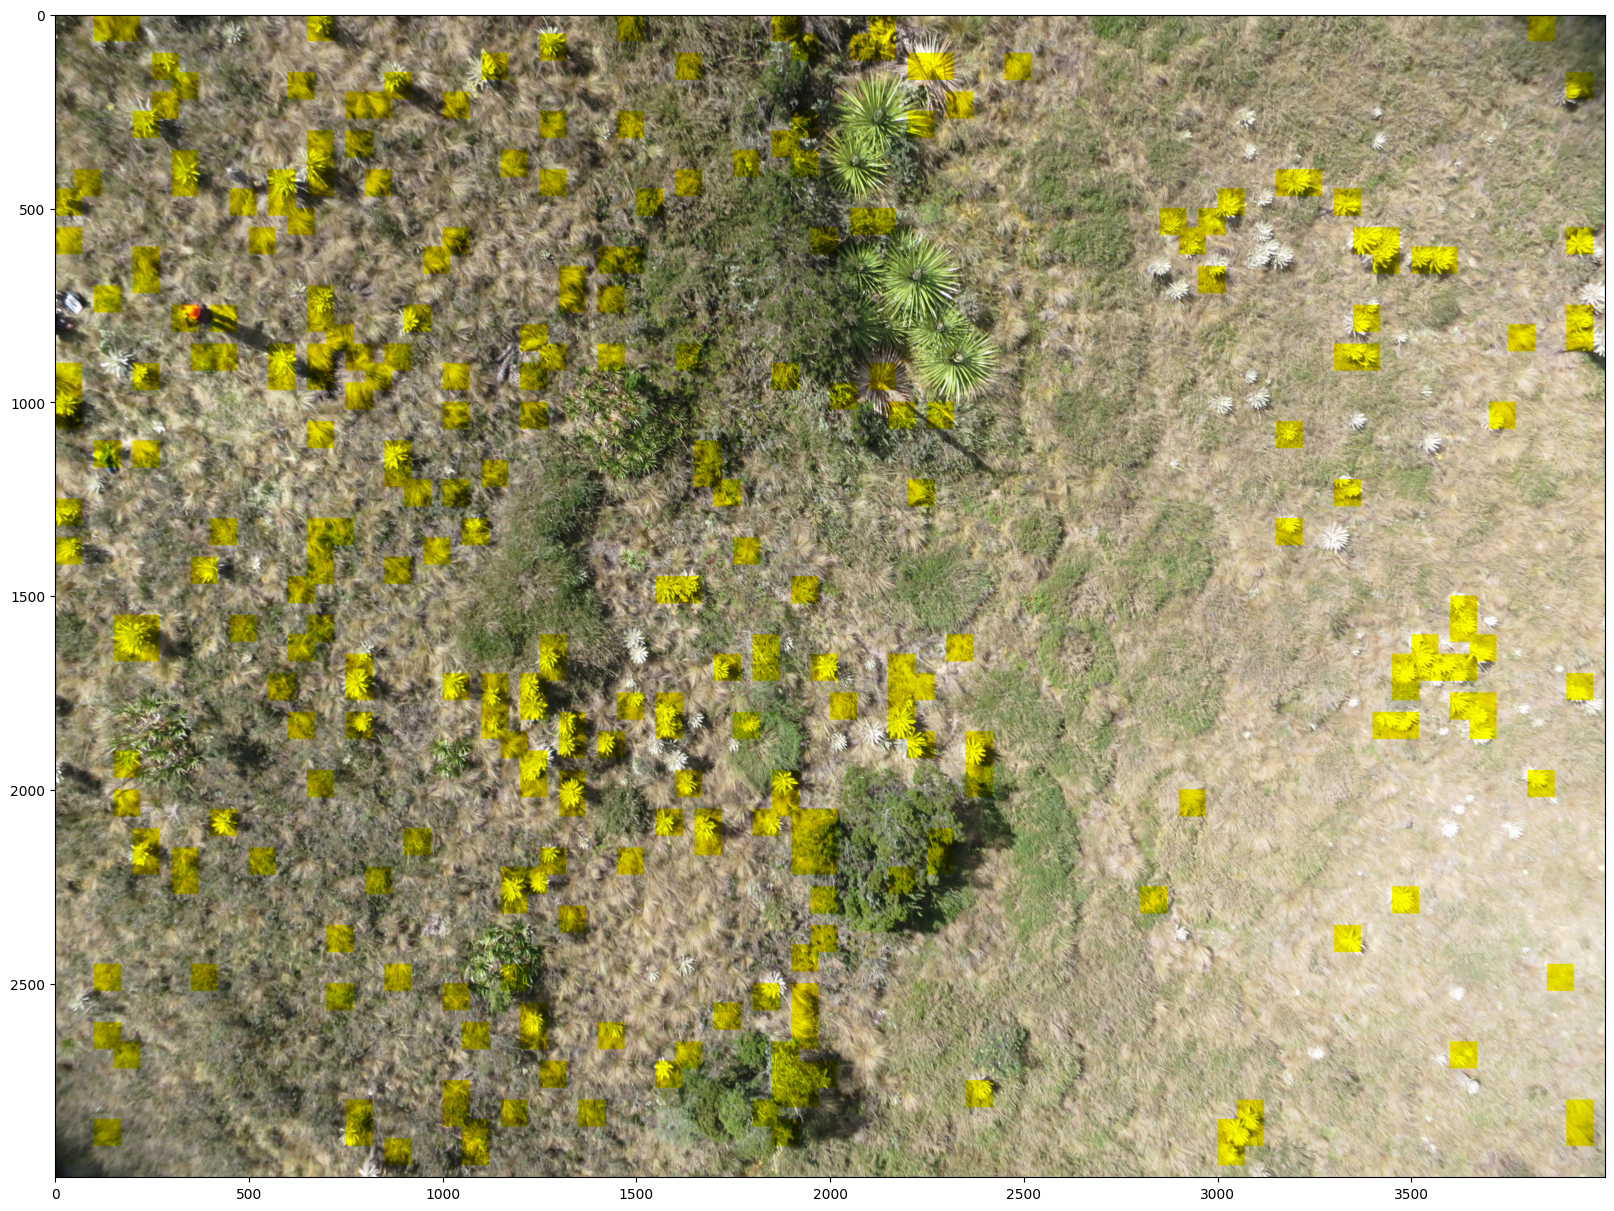

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import urllib.request
import warnings
from tensorflow.keras.layers import Dense, Flatten, Dropout
import random
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline


# Cargar imagen de prueba
urllib.request.urlretrieve('https://github.com/sergiomora03/AdvancedTopicsAnalytics/blob/main/notebooks/img/IMG_3451.JPG?raw=true', 'IMG_3451.JPG')
img = load_img('IMG_3451.JPG')

# Descargar e importar el script para cargar imágenes
urllib.request.urlretrieve('https://raw.githubusercontent.com/sergiomora03/AdvancedTopicsAnalytics/main/notebooks/img/ImportImagenesURL.py', 'ImportImagenes.py')
from ImportImagenes import import_imagenes

# Cargar imágenes de entrenamiento y prueba
X, Y = import_imagenes()
print("Forma original de X:", X.shape)  # (14700, 250)
print("Forma original de Y:", Y.shape)  # (1, 250)
Y = Y.reshape(-1)

# Dividir los datos en conjuntos de entrenamiento y validación
CE_x, CV_x, CE_y, CV_y = train_test_split(X.T, Y, test_size=0.3, random_state=100)
print("CE_x shape:", CE_x.shape)
print("CE_y shape:", CE_y.shape)
print("CV_x shape:", CV_x.shape)
print("CV_y shape:", CV_y.shape)

# Definir red neuronal
def modelo_red2_keras(CE_x, CE_y, CV_x, CV_y, n_h, num_iter, tasa, dropout_rate, batch_size, semilla, print_c):
    np.random.seed(semilla)
    tf.random.set_seed(semilla)

    model = Sequential()
    model.add(Flatten(input_shape=CE_x.shape[1:]))
    model.add(Dense(units=n_h, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=tasa), loss='binary_crossentropy', metrics=['auc'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    history = model.fit(CE_x, CE_y, validation_data=(CV_x, CV_y), batch_size=batch_size, epochs=num_iter, verbose=1 if print_c else 0, callbacks=[early_stopping])
    param = model.get_weights()
    epoc = np.argmin(history.history['val_loss']) + 1  # Mejor época basada en validación
    return model, param, epoc, history

# Entrenar el modelo
#model, param, epoc, history = modelo_red2_keras(CE_x, CE_y, CV_x, CV_y, n_h=128, num_iter=341, tasa=0.00019729436454094147, semilla=42, print_c=True)

#Mejores hiperparámetros: {'n_h': 332, 'dropout_rate': 0.4016952403827082, 'learning_rate': 0.0006161941921891564, 'batch_size': 282, 'num_epochs': 146}
#Mejores hiperparámetros: {'n_h': 76, 'dropout_rate': 0.3206224843586831, 'learning_rate': 0.00023745460054582187, 'batch_size': 435, 'num_epochs': 288}
#Mejores hiperparámetros: {'n_h': 428, 'dropout_rate': 0.2948388655655226, 'learning_rate': 3.9563664553994944e-05, 'batch_size': 325, 'num_epochs': 163}
#Mejor AUC: 0.9200581312179565
# Entrenar el modelo con los mejores hiperparámetros
model, param, epoc, history = modelo_red2_keras(
    CE_x, CE_y, CV_x, CV_y,
    n_h=428,  # número de neuronas en la capa oculta
    num_iter=163,  # número de épocas
    tasa=3.9563664553994944e-05,  # tasa de aprendizaje
    dropout_rate= 0.2948388655655226,  # tasa de dropout
    batch_size=325,  # tamaño de batch
    semilla=42,
    print_c=True
)
print("Mejor época:", epoc)

# Graficar métricas del modelo
plt.figure(figsize=(12, 5))

# Gráfico de AUC
plt.subplot(1, 2, 1)
plt.plot(history.history['auc'], label='Training AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

# Gráfico de Pérdida (Loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluación del modelo en conjunto de validación
loss, auc = model.evaluate(CV_x, CV_y)
print(f"Loss en validación: {loss}")
print(f"AUC en validación: {auc}")

# Función para realizar la predicción usando los parámetros del modelo
def pred(param, vec):
    W1, b1, W2, b2 = param

    # Capa 1
    Z1 = np.dot(W1.T, vec) + b1
    A1 = np.maximum(0, Z1)  # ReLU

    # Capa 2
    Z2 = np.dot(W2.T, A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))  # Sigmoide

    A2_mean = np.mean(A2)
    return 1 if A2_mean > 0.5 else 0

# Procesamiento de la imagen de prueba
x = np.array(img)
x2 = x.copy()  # copia de la imagen para modificarla

# Dimensiones de la imagen
ni = x.shape[0] - 50
mi = x.shape[1] - 50

# Procesamiento de la imagen en bloques
f1 = 0
f2 = 70
for i in range(1, ni, 50):
    c1 = 0
    c2 = 70
    for j in range(1, mi, 50):
        # Extraer el bloque de la imagen
        subi = x[f1:f2, c1:c2]

        # Redimensionar el bloque a las dimensiones esperadas por el modelo
        subi_resized = tf.image.resize(subi, (70, 70))  # Mantener el tamaño original de 70x70
        subi_resized_np = subi_resized.numpy()  # Convertir el tensor a un array de NumPy
        subi2 = subi_resized_np.flatten().T / 255.0  # Aplanar y normalizar la subimagen

        # Ajustar el tamaño del vector para que coincida con la entrada esperada (14700 características)
        vec = subi2.reshape(-1, 1)  # Asegura que vec sea un vector columna

        # Realizar predicción
        pred_P = pred(param, vec)

        # Si se predice 1, modificar el canal
        if pred_P == 1:
            x2[f1:f2, c1:c2, 2] = 0  # Cambia el canal si es predicho como 1

        # Mover el cursor a la siguiente columna
        c1 += 50
        c2 += 50

    # Mover el cursor a la siguiente fila
    f1 += 50
    f2 += 50

# Mostrar la imagen modificada
plt.figure(figsize=(20, 20))
plt.imshow(x2)
plt.show()

In [2]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.2 MB/s eta 0:00:00


In [3]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Función objetivo para Optuna
def objective(trial):
    # Sugerir hiperparámetros
    n_h = trial.suggest_int('n_h', 64, 512)  # Número de neuronas en la capa oculta
    dropout_rate = trial.suggest_float('dropout_rate', 0.05, 0.5)  # Tasa de dropout ampliada
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-2)  # Tasa de aprendizaje ampliada
    batch_size = trial.suggest_int('batch_size', 32, 512)  # Tamaño de batch ampliado
    num_epochs = trial.suggest_int('num_epochs', 50, 500)  # Mayor número de épocas para búsqueda más precisa


    # Crear el modelo
    model = Sequential()
    model.add(Flatten(input_shape=CE_x.shape[1:]))
    model.add(Dense(units=n_h, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=[tf.keras.metrics.AUC(name='auc')])  # Métrica 'AUC' explícita

    # Definir callbacks
    early_stopping = EarlyStopping(monitor='val_auc', patience=10, restore_best_weights=True, mode='max')

    # Entrenar el modelo
    history = model.fit(CE_x, CE_y,
                        validation_data=(CV_x, CV_y),
                        batch_size=batch_size,
                        epochs=num_epochs,
                        verbose=0,
                        callbacks=[early_stopping])

    # Verificar si 'val_auc' existe en el historial
    if 'val_auc' in history.history:
        val_auc = max(history.history['val_auc'])
    else:
        val_auc = 0

    return val_auc

# Correr la optimización
study = optuna.create_study(direction='maximize')  # Maximizar el AUC
study.optimize(objective, n_trials=100)  # Realizar 100 intentos para encontrar los mejores hiperparámetros


# Mostrar los mejores hiperparámetros
print(f"Mejores hiperparámetros: {study.best_params}")
print(f"Mejor AUC: {study.best_value}")


[I 2024-09-05 22:34:33,419] A new study created in memory with name: no-name-4f7d81cc-ac29-43b4-8ca4-9033ed8a3ec9
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[I 2024-09-05 22:35:09,930] Trial 0 finished with value: 0.8844476938247681 and parameters: {'n_h': 151, 'dropout_rate': 0.3118073962679708, 'learning_rate': 1.888782591429298e-05, 'batch_size': 169, 'num_epochs': 136}. Best is trial 0 with value: 0.8844476938247681.
[I 2024-09-05 22:35:14,556] Trial 1 finished with value: 0.5 and parameters: {'n_h': 216, 'dropout_rate': 0.1051219286796814, 'learning_rate': 0.006140137154029904, 'batch_size': 268, 'num_epochs': 226}. Best is trial 0 with value: 0.8844476938247681.
[I 2024-09-05 22:35:20,509] Trial 2 finished with value: 0.888808131217

Mejores hiperparámetros: {'n_h': 428, 'dropout_rate': 0.2948388655655226, 'learning_rate': 3.9563664553994944e-05, 'batch_size': 325, 'num_epochs': 163}
Mejor AUC: 0.9200581312179565
